In [49]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cv2
import pathlib

In [61]:
def extractImages(fileName):
    print(fileName)
    pathOut = str(pathlib.Path().absolute()) + "/" + fileName[0:-4] + "/"
    print(pathOut)
    count = 0
    vidcap = cv2.VideoCapture(fileName)
    success,image = vidcap.read()
    success = True
    while success:
        # vidcap.set(cv2.CAP_PROP_POS_MSEC,(count*1000))    # added this line
        success,image = vidcap.read()

        if success:
            print ('Read a new frame: ', success)
            frameName = pathOut + "frame%d.jpg" % count
            print(frameName)

            cv2.imwrite(frameName, image)     # save frame as JPEG file
            count = count + 1

In [63]:
extractImages('Videos/JohnOliver1-cropped.mp4')

Videos/JohnOliver1-cropped.mp4
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame0.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame2.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame3.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame4.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame5.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-croppe

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame72.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame73.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame74.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame75.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame76.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame77.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame78.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliv

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame144.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame145.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame146.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame147.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame148.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame149.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame150.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/J

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame216.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame217.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame218.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame219.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame220.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame221.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame222.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/J

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame289.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame290.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame291.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame292.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame293.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame294.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame295.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/J

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame360.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame361.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame362.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame363.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame364.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame365.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame366.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/J

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame425.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame426.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame427.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame428.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame429.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame430.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame431.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/J

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame496.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame497.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame498.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame499.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame500.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame501.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame502.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/J

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame570.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame571.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame572.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame573.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame574.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame575.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame576.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/J

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame644.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame645.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame646.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame647.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame648.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame649.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame650.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/J

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame717.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame718.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame719.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame720.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame721.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame722.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame723.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/J

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame790.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame791.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame792.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame793.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame794.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame795.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame796.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/J

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame863.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame864.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame865.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame866.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame867.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame868.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame869.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/J

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame937.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame938.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame939.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame940.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame941.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame942.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame943.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/J

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1011.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1012.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1013.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1014.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1015.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1016.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1017.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/V

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1084.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1085.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1086.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1087.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1088.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1089.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1090.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/V

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1156.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1157.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1158.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1159.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1160.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1161.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1162.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/V

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1230.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1231.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1232.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1233.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1234.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1235.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1236.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/V

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1303.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1304.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1305.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1306.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1307.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1308.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1309.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/V

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1375.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1376.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1377.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1378.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1379.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1380.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1381.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/V

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1448.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1449.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1450.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1451.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1452.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1453.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1454.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/V

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1523.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1524.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1525.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1526.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1527.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1528.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1529.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/V

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1597.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1598.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1599.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1600.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1601.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1602.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1603.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/V

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1671.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1672.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1673.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1674.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1675.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1676.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1677.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/V

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1745.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1746.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1747.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1748.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1749.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1750.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1751.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/V

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1819.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1820.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1821.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1822.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1823.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1824.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1825.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/V

Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1893.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1894.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1895.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1896.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1897.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1898.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1899.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/V

/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1967.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1968.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1969.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1970.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1971.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1972.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-cropped/frame1973.jpg
Read a new frame:  True
/home/snippy/Documents/CS/CMSC472/Final Proj/deepfake-generation/Videos/JohnOliver1-croppe

82 583 211 454 (565, 1000, 3)
129 129


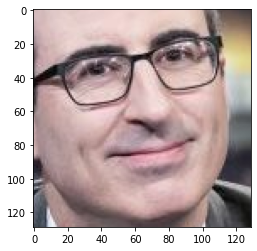

In [46]:
image = face_recognition.load_image_file("./Faces/JohnOliver1.jpg")
top, right, bottom, left = face_recognition.face_locations(image)[0]
print(top, right, bottom, left,image.shape)

fig, ax = plt.subplots()
ax.plot(left,bottom, 'ro')
ax.plot(right,top, 'ro')
print(bottom-top,http://localhost:8888/notebooks/deepfake-generation/Face%20Deetection.ipynb#right-left)
plt.imshow(image[top:bottom,left:right])
#(top, right, bottom, left)

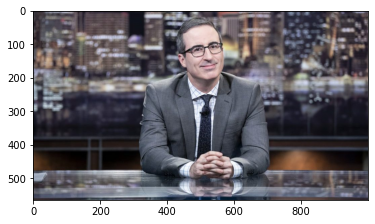

In [45]:
plt.imshow(image)